C:\Users\tybta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2748: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


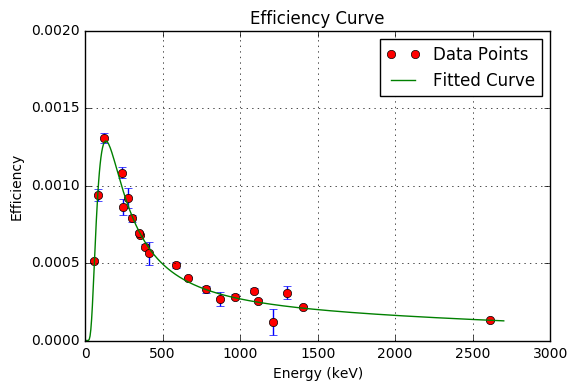

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import csv

class Efficiency(object):
    """
    Object for undertaking the Efficiency Calibration of a detector.
    Currently only plots the Efficiency versus Energy data and the fitted curve.
    """

    def __init__(self,
                path = 'Efficiency.csv'
                ):
        
        self.path = path
        self.rows = []
        self.energy = []
        self.efficiency = []
        self.values = []
        self.unc = []
        self.x = []
        self.y = []
        self.space = np.linspace(1, 2700, 540)
        self.z = []
        self.fit = []
        self.new_fit = []


    def open(self):
        """
        Reads the csv file.
        """
        with open(self.path, newline='') as f:
            reader = csv.reader(f)
            self.rows = [r for r in reader]

    def sort(self): 
        """
        Sorts the data.
        """
        for i in self.rows:
            self.energy.append(float(i[0]))
            self.efficiency.append(([float(i[1]), float(i[2])]))

    def unwrap_lst_unc(self):
        """
        Separates data.
        """
        for i in self.efficiency: 
            self.values.append(i[0])
            self.unc.append(i[1])

    def mutate(self):
        """
        Mutates data and creates the fit function.
        """
        for i in self.energy: 
            self.x.append(np.log(i/1460))
        for i in self.values:
            self.y.append(np.log(i))
        self.z = np.polyfit(np.asarray(self.x), np.asarray(self.y), 4)

    def normal(self, x): 
        return np.log(x/1460)

    def func3(self, x): 
        return (self.z[0]*self.normal(x)**4)+(self.z[1]*self.normal(x)**3)+(self.z[2]*self.normal(x)**2)+(self.z[3]*self.normal(x))+(self.z[4])

    def new_func(self, x): 
        return np.exp(func3(x))

    def fitting(self):
        """
        Fits the data.
        """
        for i in self.space:
            self.fit.append(self.func3(i))
        for i in self.fit:
            self.new_fit.append(np.exp(i))

    def plotter(self):
        """
        Plots the data and the fit.
        """
        plt.title('Efficiency Curve')
        plt.xlabel('Energy (keV)')
        plt.ylabel('Efficiency')
        plt.errorbar(self.energy, self.values, fmt=None, yerr=self.unc)
        plt.plot(self.energy, self.values, 'ro')
        plt.grid()
        plt.plot(self.space, self.new_fit)
        plt.legend(('Data Points', 'Fitted Curve'), loc='upper right')
        plt.ylim(0, 0.002)
        plt.show()
        
    def main(self):
        self.open()
        self.sort()
        self.unwrap_lst_unc()
        self.mutate()
        self.fitting()
        self.plotter()

if __name__ == '__main__':
    eff = Efficiency()
    eff.main()

